In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
pt = 4/3
halfsize = (3, 3/1.618)
fullsize = (5, 5/1.618)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [40]:
def potf(x):
    return 0*x

def potpot_indiv(x):
    if x <= 0 or x >= 1:
        return np.inf
    else:
        return 0.
    
def potpot(x):
    return np.vectorize(potpot_indiv)(x)

def potq(x):
    return 10*x**2/2

def step(x,pot,dx=0.01):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

In [6]:
def do_sim(num_steps,num_traj,pot,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    for i in range(1,num_steps):
        x[i] = step(x[i-1],pot)
    return x

def plot_sim(x):
    msd = np.average(x**2,axis=1)
    fig,ax = plt.subplots(2,1)
    for j in range(0,x.shape[1]):
        ax[0].plot(x[:,j])
    ax[1].plot(msd)
    return plt.gcf()

# Consistent start

<timed exec>:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


CPU times: user 1.74 s, sys: 998 µs, total: 1.74 s
Wall time: 1.74 s


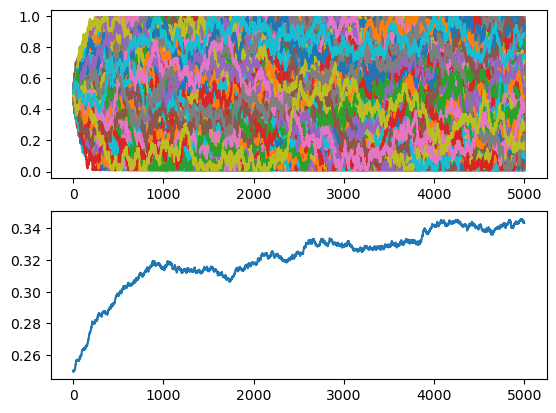

In [41]:
%%time
x = do_sim(5000,1000,potpot, xinit=0.5)
plot_sim(x).show()

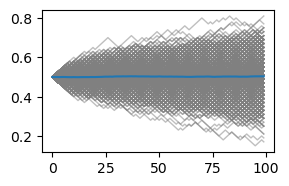

In [44]:
plt.figure(figsize=halfsize)
end = 100
for t in x.T:
	plt.plot(t[0:end], color="gray", lw=1, alpha=0.5)
plt.plot(np.average(x[0:end], axis=1))
plt.savefig("../figures/02 time evolution.pdf")
plt.show()

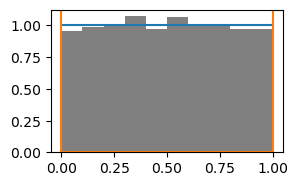

In [73]:
plt.figure(figsize=halfsize)
hist, bins = np.histogram(x[1000:].ravel(), bins=np.arange(0, 1+0.1, 0.1), density=True)
plt.bar(bins[:-1], hist, align="edge", width=1/len(hist), color="gray")
plt.plot([0,1], [1,1], color=colors[0])
plt.plot([0, 1], [0, 0], color=colors[1])
plt.axvline(0, color=colors[1])
plt.axvline(1, color=colors[1])
plt.savefig("../figures/02 histogram.pdf")
plt.show()

# Random Start

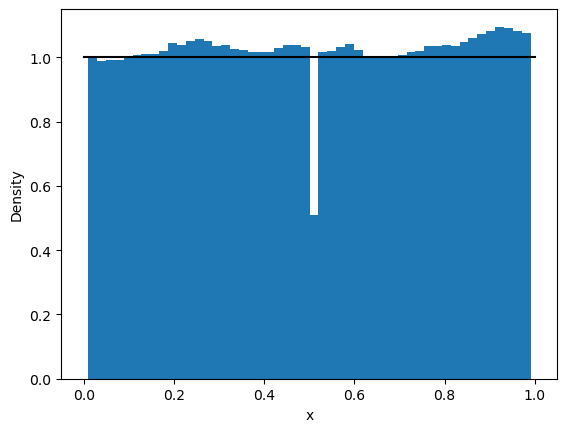

In [52]:
hist, bins = np.histogram(x[1000:, :].ravel(), bins=50, density=True)
plt.bar(bins[:-1], hist, align="edge", width=1/len(hist))
plt.plot([0,1], [1,1], color="black")
plt.xlabel("x")
plt.ylabel("Density")
# plt.savefig("../figures/02 potential well.pdf")
plt.show()

# 2D hist

In [136]:
%%time
x = do_sim(2500,1000,potpot, xinit=0.5)

CPU times: user 708 ms, sys: 4.01 ms, total: 712 ms
Wall time: 711 ms


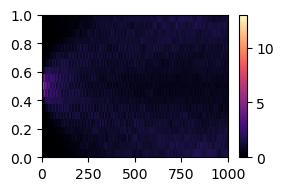

In [153]:
bins = np.linspace(0, 1, 20)
times = range(x.shape[1])
hist = np.array([np.histogram(i, bins)[0] for i in x])
hist = hist / np.average(hist, axis=0)

plt.figure(figsize=halfsize)
plt.imshow(
	hist.T,
	aspect="auto",
	origin="lower",
	extent=[
		0, x.shape[1], 
		0, 1
	],
	cmap="magma",
	# norm=mpl.colors.LogNorm(vmin=1e-1)
	vmin=0,
	interpolation="none"
)
plt.colorbar(label="")

plt.show()

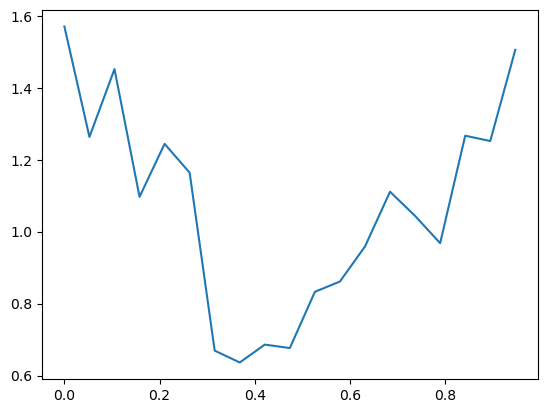

In [159]:
plt.plot(bins[:-1], hist[-1])